### Run this tutorial notebook on Google Colab
**LINK:** https://colab.research.google.com/drive/1YMw79uBxBQO2we52QeRTxAwTP1G5a3rM

### Download example dataset

In [1]:
!curl -c /tmp/cookies "https://drive.google.com/uc?export=download&id=1AvU1UDSeg4uWfPA8JynjrrNnvg8oa0AZ" > /tmp/intermezzo.html
!curl -L -b /tmp/cookies "https://drive.google.com$(cat /tmp/intermezzo.html | grep -Po 'uc-download-link" [^>]* href="\K[^"]*' | sed 's/\&amp;/\&/g')" > dataset.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3254    0  3254    0     0   3254      0 --:--:-- --:--:-- --:--:--  5478
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0"sed" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


### read the text file

Each line in the text file contains the information of a single paper. <br>
The format of each line is:<br>
doc_id<-SEPARATOR->doi<-SEPARATOR->year<-SEPARATOR->title<-SEPARATOR->journal_name<-SEPARATOR->authors<-SEPARATOR->abstract<-SEPARATOR->fullbody

The flag word "<-SEPARATOR->" is used to separate different fields of the document. We can extract needed fields using following code.

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv( "dataset.txt" , sep=r"<-SEPARATOR->", header= 0, index_col= False, dtype="str",  keep_default_na = False )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Let's have a look a a few examples in df

In [0]:
df.head()

,doc_id,doi,year,title,journal_name,authors,abstract,fullbody
0,200,10.5812/jjm.33498,2016,Study of Genetic Variation of Leishmania majo...,Jundishapur Journal of Microbiology,Mansour Dabirzadeh\tMohammad Hashemi\tYahya Ma...,Background Zoonotic cutaneous leishmaniasis (Z...,1. Background Zoonotic cutaneous leishmaniasis...
1,201,10.5812/jjm.32388,2016,Characterization of Oxacillinase and Metallo-β...,Jundishapur Journal of Microbiology,Saeed Shoja\tMojtaba Moosavian\tSoodabeh Rosta...,Background: Carbapenem resistant Acinetobacter...,"1. Background In recent years, Acinetobacter b..."
2,202,10.5812/jjm.28291,2016,Staphylococcus aureus Isolates Carrying Panto...,Jundishapur Journal of Microbiology,Laleh Shariati\tMajid Validi\tAli Mohammad Has...,Background: A diversity of virulence factors w...,1. Background Staphylococcus aureus is a commo...
3,203,10.5812/jjm.10168,2014,In Vitro Study of Potentially Probiotic lacti...,Jundishapur Journal of Microbiology,Hooshang Niazi Amraii\tHamid Abtahi\tParvaneh ...,Background: Probiotic microorganisms are selec...,1. Background Great attention is currently dra...
4,204,10.5812/jjm.17824,2014,Phenotypic Characteristics and Probiotic Poten...,Jundishapur Journal of Microbiology,Nasrin Noohi\tNasrin Noohi\tGholamhosein Ebrah...,"Background: Lactic acid bacteria, especially L...",1. Background The normal flora bacteria in int...


We can get a subset of the fields from the dataframe above. For example, get the "title" and "abstract" fields and only get the top 100 records.

In [0]:
sub_df= df[[ "title" , "abstract" ]][:100]

In [0]:
sub_df

,title,abstract
0,Study of Genetic Variation of Leishmania majo...,Background Zoonotic cutaneous leishmaniasis (Z...
1,Characterization of Oxacillinase and Metallo-β...,Background: Carbapenem resistant Acinetobacter...
2,Staphylococcus aureus Isolates Carrying Panto...,Background: A diversity of virulence factors w...
3,In Vitro Study of Potentially Probiotic lacti...,Background: Probiotic microorganisms are selec...
4,Phenotypic Characteristics and Probiotic Poten...,"Background: Lactic acid bacteria, especially L..."
...,...,...
95,Rapid Detection of Rifampicin- and Isoniazid-R...,Background Accurate and rapid detection of dru...
96,Detection of Parvovirus B19 Infection in Thala...,"Background: Parvovirus B19, a member of the Er..."
97,Prevalence of Helicobacter pylori in Patient...,Background: The prevalence rate of gastric inf...
98,Prevalence of Enterotoxigenic Staphylococcus ...,Background: The enterotoxigenic Staphylococcus...


we can also create a dataset by create a list of [ title, abstract ] pairs

In [0]:
ds = [  [ title, abstract ]   for title, abstract  in zip( df.title , df.abstract )]

In [0]:
print( "total number of title-abstract pairs:", len(ds) )
print( "First example in the dataset:\nTitle:\t%s\nAbstract:\t%s"%( ds[0][0], ds[0][1] ) )

total number of title-abstract pairs: 10000
First example in the dataset:
Title:	Study of Genetic Variation of  Leishmania major  Based on Internal Transcribed Spacer 1 (ITS1) in Chabahar, Iran
Abstract:	Background Zoonotic cutaneous leishmaniasis (ZCL) is polymorphic disease that may show various clinical manifestations. Objectives This study investigates the determination of genetic variation within the species of Leishmania major isolates from new cases in Chabahar, a port city in Southeast Iran (situated at the Iran-Pakistan border). Migration in this region indicates that leishmaniasis is spreading gradually, and a new micro-habitat focus appears each year. Materials and Methods A variety of nucleic acid detection methods that target both DNA and RNA have been developed. The restriction fragment length polymorphism analysis of amplified internal transcribed spacer 1 with polymerase chain reaction (ITS1-RFLP PCR) assay is a multipurpose tool for the diagnosis of Leishmania from cli

### Tokenization
As shown above, the text contains many non-alphabetic characters, like "(", ")" , punktuations. For the text retrieval task, those characters are usually removed since they are not informative. Capitalized characters are usually lowered. Therefore, a tokenization procedure is needed.

In [0]:
import nltk
from nltk import RegexpTokenizer
# This tokenizer is simply to use a regular expression "\w+" to remove all characters which are not from the set [0-9A-Za-z]
# This is not the best one but is very fast. Explore the nltk package for more powerful tokenizer!
tokenizer = RegexpTokenizer( "\w+" )

# Use this tokenizer to tokenize the dataset we just created.
for record in ds:
    record[0] = " ".join(tokenizer.tokenize( record[0].lower()  ))
    record[1] = " ".join(tokenizer.tokenize( record[1].lower()  ))

Let's have a look at one example in the dataset.

In [0]:
ds[0]

['study of genetic variation of leishmania major based on internal transcribed spacer 1 its1 in chabahar iran',
 'background zoonotic cutaneous leishmaniasis zcl is polymorphic disease that may show various clinical manifestations objectives this study investigates the determination of genetic variation within the species of leishmania major isolates from new cases in chabahar a port city in southeast iran situated at the iran pakistan border migration in this region indicates that leishmaniasis is spreading gradually and a new micro habitat focus appears each year materials and methods a variety of nucleic acid detection methods that target both dna and rna have been developed the restriction fragment length polymorphism analysis of amplified internal transcribed spacer 1 with polymerase chain reaction its1 rflp pcr assay is a multipurpose tool for the diagnosis of leishmania from clinical samples and for enabling the determination of the infecting leishmania species the goal of this 

### Text Retrieval

Here we use one example for the following task:
use title as query to search for abstracts from the corpus

#### Keyword-based search: BM25 (Okapi BM25)

Install the rank_bm25 package

In [0]:
!pip install rank_bm25

  Created wheel for rank-bm25: filename=rank_bm25-0.2-cp36-none-any.whl size=4162 sha256=7ac71b43bc9a344081bbf6f55ad0c4c2940261109fada94dc46c11c8ce65e270
  Stored in directory: /root/.cache/pip/wheels/6f/0c/1f/78945dd6a5478bbcdb50d73ac96ae5af2ffcdfcd374fd9b1bf
Successfully built rank-bm25


In [0]:
from rank_bm25 import BM25Okapi
# the queries is a list of titles
# the corpus is a list of abstracts
queries, corpus = zip( *ds )
# build the index for the corpus
tokenized_corpus = [ doc.split() for doc in corpus]
bm25 = BM25Okapi( tokenized_corpus )

In [0]:
# Ranking of documents given a query
query = queries[0]
doc_scores = bm25.get_scores( query.split() )
# The doc_scores contains the bm25 score of ech document in the corpus. The higher the document score is, the closer the document is to the query.

In [0]:
# get the index of top 20 closest documents to the query
Knn_ids = np.argsort( -doc_scores )[:20]

In [0]:
print("Query ID:\t%d"%( 0 ))
print("20 closest documents ids:", Knn_ids  )

Query ID:	0
20 closest documents ids: [   0  363 7804   19  331 7825  439  386  141 2090 3164  201 2399 4450
  737   41 5338   23  303  432]


Since the query id is 0 and the id of the document with highest bm25 score is also 0. This means that the bm25 search engine has successfully found the target abstract from the corpus. <br>

**Evaluation of performance** <br>
1. M@L score. M@L score is defined by the frequency that the "real" abstract appears within the top L searched results. For example, if we query for 100 times, and the "real" abstract appear in top L results for 80 times, then the M@L score is 0.8.
2. M distribution. Plot the distribution of the rank orders of the "real" abstracts over a certain amount of querying experiments.    

In [0]:
from tqdm import tqdm
# We first perform 1000 queries and get a record for Knn_ids for each query.
real_qeury_ids = []
Knn_ids_record = []
count = 0
for query in tqdm(queries):    # tqdm is used to visualize the progress, not mandatory
    real_qeury_ids.append(count)
    doc_scores = bm25.get_scores( query.split() )
    Knn_ids = np.argsort( -doc_scores )[:20]
    Knn_ids_record.append( Knn_ids )
    count +=1
real_qeury_ids = np.array(real_qeury_ids)
Knn_ids_record = np.asarray( Knn_ids_record )

100%|██████████| 10000/10000 [11:02<00:00, 15.10it/s]


In [0]:
# M@1 score:
M1_score =  np.mean( np.any( Knn_ids_record[:,:1] == real_qeury_ids[:, np.newaxis], axis=-1 ))
print( "M@1 score is:", M1_score )

M@1 score is: 0.8088


M@20 score: 0.8527


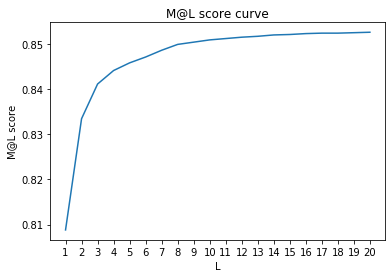

In [0]:
# M@1 to M@20 score
import matplotlib.pyplot as plt

ML_score_list = []
for L in range(1,21):
    ML_score_list.append( np.mean( np.any( Knn_ids_record[:,:L] == real_qeury_ids[:, np.newaxis], axis=-1 )) )

print( "M@20 score:", ML_score_list[-1] )
plt.plot( np.arange(1,21), ML_score_list )
plt.xlabel("L")
plt.ylabel("M@L score")
plt.title("M@L score curve")
plt.xticks( np.arange(1,21) )
plt.show()

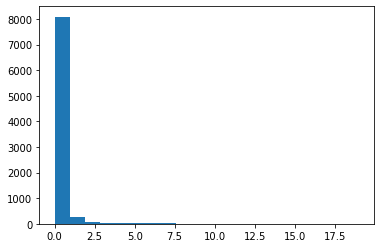

In [0]:
# M distribution
rank_order_list =[]
for idx in range(len(real_qeury_ids)):
    if  real_qeury_ids[idx] in  Knn_ids_record[idx]:
         rank_order_list.append( np.argwhere(  real_qeury_ids[idx] == Knn_ids_record[idx]  )[0,0] )
plt.hist( rank_order_list, bins=20 )
plt.show()

#### Embedding based search: Sent2vec

Download the pre-trained sent2vec model, trained on Pubmed dataset, 400 dimensional unigram model.

In [0]:
## Downloading the sent2vec model
!curl -c /tmp/cookies "https://drive.google.com/uc?export=download&id=1PGrbSf7mksHbYAmTpOBEl6nQl7din5Vj" > /tmp/intermezzo.html
!curl -L -b /tmp/cookies "https://drive.google.com$(cat /tmp/intermezzo.html | grep -Po 'uc-download-link" [^>]* href="\K[^"]*' | sed 's/\&amp;/\&/g')" > sent2vec_model.bin

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3256    0  3256    0     0  33224      0 --:--:-- --:--:-- --:--:-- 32888
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   4731      0 --:--:-- --:--:-- --:--:--  4731
100 8404M    0 8404M    0     0  62.1M      0 --:--:--  0:02:15 --:--:--  109M


In [0]:
## Install sent2vec
## Installing sent2vec
!git clone https://github.com/epfml/sent2vec.git
!cd sent2vec &&  make && pip install . 

Cloning into 'sent2vec'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 379 (delta 3), reused 6 (delta 1), pack-reused 368
Receiving objects: 100% (379/379), 446.78 KiB | 10.15 MiB/s, done.
Resolving deltas: 100% (231/231), done.
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/args.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/dictionary.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/productquantizer.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/shmem_matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/qmatrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/vector.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/model.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/utils.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/fasttext.cc
c++ -pthread -std=c++0x -O3 -funroll-loops args.o 

In [0]:
## Load the sent2vec model into RAM
import sent2vec
model = sent2vec.Sent2vecModel()
model.load_model( "sent2vec_model.bin" )

Compute the embedding of each document in the database. 

In [0]:
### Compute the embedding of each document in the database
"""
Note that this database should be first cleaned by tokenization, then used to compute embedding
Since here we want to use title as query to search abstracts, abstracts can be treated as the database, and titles can
be treated as query set.
"""
title_list , abstract_list = zip(*ds)
doc_embeddings = []
for doc in abstract_list:
    doc_embeddings.append( model.embed_sentence( doc ) )
doc_embeddings = np.concatenate( doc_embeddings, axis = 0 )

In [0]:
print(doc_embeddings.shape)

(10000, 400)


In this example, we want to use cosine similarity as the distance metric to perform KNN search. <br>
Given to vectors $a$ and $b$, the cosine simarity between them is $\frac{a^T b}{\|a\|\|b\|}$. If both $a$ and $b$ are normalized, then the cosine simarity is simply vector dot product $a^Tb$

In [0]:
# normalize the doc_embeddings
normalized_embeddings = doc_embeddings
# In case that there are zero vectors in the embedding matrix, we only normalize the non-zero vectors in the embedding matrix
non_zero_indices = np.logical_not( np.all( normalized_embeddings == 0 , axis = 1 ) )
normalized_embeddings[ non_zero_indices ] = normalized_embeddings[ non_zero_indices ]/np.linalg.norm( normalized_embeddings[ non_zero_indices ], axis =1, keepdims=True )

Perform ranking given a query text. For each query, first compute its embedding and perform K nearest neighbor search in the coprus embedding space.

In [0]:
## pick up a query
query = title_list[0]
## tokenize and compute its embedding, since here query is already tokenized, we can skip tokenization.
query_embedding = model.embed_sentence(query)
## normalize the query embedding
if not np.all( query_embedding ==0  ):
    normalized_query_embedding = query_embedding/np.linalg.norm( query_embedding, axis =1, keepdims=True )
else:
    normalized_query_embedding = query_embedding

## compute the cosine the similarity between the query embedding and each document embedding in the database
similarity_list = np.dot( normalized_embeddings,  normalized_query_embedding[0] ) 
## find top 20 documents which have highest cosine similairty to the query
Knn_ids = np.argsort( -similarity_list )[:20]

In [0]:
print("Query ID:\t%d"%( 0 ))
print("20 closest documents ids:", Knn_ids  )

Query ID:	0
20 closest documents ids: [   0  141  306  363  700 7804  386  660  432  796 7825  708  737  749
  316  200  309  585   19   15]


**(Your Task) Evaluation of Performance**

In [0]:
############## TODO  ###############
"""
Evaluate the performance of sent2vec KNN using M@L score and M distribution.
"""













####################################

#### Hybrid Search ( Keyword boolean filter + embedding based KNN )

The hybrid search mainly contains two step:<br>
1. Keyword boolean filtering. Given a certain keyword, search from the database, only select the documents which contain that keyword;
2. In the selected document subset, perform K nearest neighbor search using sent2vec embeddings.

To perform these operations, there are a few questions to be considered: <br>
1. To perform keyword based filtering, we need a "inverted index". An inverted index is a dictionary in which for each word, an id list of documents which contain that word in recorded. <br>
Given this inverted index, we can perform keyword filtering in multiple ways. For example 1)get all the documents which contain the word "computer"; 2) get all the documents which contain both "computer" and "science"; 3) get all the documents which contain either "computer" or "science".
2. Selection of keywords in the case where no keywords are provided.

##### Computation of inverted index

We need to used the abstracts to build our inverted index

In [0]:
import nltk
from nltk import RegexpTokenizer
tokenizer = RegexpTokenizer( "\w+" )
from nltk.stem.snowball import SnowballStemmer
def preprocessor_tokenizer(s):
    s = s.lower()
    s_list=tokenizer.tokenize(s)
    ## The usage of stemmer is to merge words with the same stem into one word. 
    ## For example "playing" will be converted to "play" insted of being treated as an independent word.
    ## This can help to control the vocabulary size of inverted index, especially when the corpus is large.
    stemmer = SnowballStemmer('english')
    s_list=[stemmer.stem(word) for word in s_list]
    return s_list
def addDocUnigrams(index, doc_id, doc_tokens):
    unique_words_in_doc=set()
    for word in doc_tokens:
        if word not in unique_words_in_doc:
            if word not in index:
                index[word]=np.asarray([], dtype=np.uint32)
            index[word]=np.append(index[word], np.asarray(doc_id, dtype=np.uint32))
            unique_words_in_doc.add(word)

## create the inverted index for the abstracts corpus
title_list , abstract_list = zip(*ds)
inverted_index = dict()
doc_id = 0
for doc in tqdm(abstract_list):
    addDocUnigrams( inverted_index, doc_id, preprocessor_tokenizer( doc ) )
    doc_id +=1

100%|██████████| 10000/10000 [00:29<00:00, 341.22it/s]


Note: when we use this inverted index, the keywords should also be preprocessed by the same tokenizer as the one used for building the inverted index.

In [0]:
# Now we have the inverted index, and we can perform the boolean filtering described above.
# case 1: get all document ids which contains the word "health":
doc_ids1 = inverted_index.get( "health", np.array([],np.uint32) )
print("case1:\n",doc_ids1)
# case 2: get all document ids which contains the word "sleep":
doc_ids2 = inverted_index.get( "sleep", np.array([],np.uint32) )
print("case2:\n",doc_ids2)
# case 3: get all document ids which contains both "health" and "sleep":
doc_ids3 =  np.intersect1d( doc_ids1, doc_ids2  )
print("case3:\n",doc_ids3)
# case 3: get all document ids which contains either "health" or "sleep":
doc_ids4 =  np.union1d(  doc_ids1, doc_ids2  )
print("case4:\n",doc_ids4)

case1:
 [   2    5   15 ... 9253 9274 9310]
case2:
 [  42  507  533  862 1120 1180 1367 1570 1659 2188 2200 2254 2257 2263
 2266 2517 2625 2673 2738 2819 2916 2939 2940 2952 2986 4257 4326 4543
 5563 5789 6633 6674 6783 6954 6960 7073 7100 7166 7241 7387 7631 8158
 8542]
case3:
 [  42  862 1120 1180 1570 1659 2188 2200 2266 2819 2916 4257 7241 7387]
case4:
 [   2    5   15 ... 9253 9274 9310]


##### Selection of Keyword(s)

In the case where no keywords are provided, we can extract keyword(s) using TF-IDF score. <br>

In [0]:
## given a query
query = title_list[0]
tokenized_query = preprocessor_tokenizer(query)
print( tokenized_query )

['studi', 'of', 'genet', 'variat', 'of', 'leishmania', 'major', 'base', 'on', 'intern', 'transcrib', 'spacer', '1', 'its1', 'in', 'chabahar', 'iran']


In [0]:
def select_keywords( tokenized_query, inverted_index, N, m ):
    """
    N is the total number of documents in the corpus
    m is the number of keywords to be selected
    """
    unique_token_occurance = {}
    ## for each unique token in the query, count its occurance in the query, which is used for compute the term frequency.
    for token in tokenized_query:
        unique_token_occurance[token] = unique_token_occurance.get( token, 0 ) +1
    assert m <= len( unique_token_occurance )
    tfidf_score_list = []
    unique_token_list = list(unique_token_occurance.keys())
    for token in unique_token_list:
        ## compute term frequency
        tf = unique_token_occurance[token]/ len(tokenized_query)
        ## compute the inverse document frequency
        idf = np.log( N/ ( len( inverted_index.get( token, np.array([], np.uint32) ) ) +1 ) )
        tfidf_score_list.append(tf*idf)
    
    ## select m keywords with highest tf-idf score
    selected_token_ids = np.argsort( tfidf_score_list)[::-1][:m]
    return [  unique_token_list[idx] for idx in  selected_token_ids ]

In [0]:
## keyword selection
N = len( abstract_list )
selected_keywords = select_keywords( tokenized_query, inverted_index, N, 3  )
print(selected_keywords)

['chabahar', 'its1', 'leishmania']


**(Your Task) Implementing the Hybrid search & Evaluation Performance**

In [0]:
########################## TODO ########################
"""
1. Given a query, preprocessing it and select keyword(s);
2. Use the selected keywords and the inverted index to perform boolean filtering
3. In the filtered subset of documents, perform K nearest neighbor search using sent2vec embedding
4. Evaluate the performance using M@L score and M distribution

Note: try different varations of keyword selection, e.g, the number of keywords used; 
      try different way of boolean filtering logic, e.g "AND" logic and "OR" logical;
      check which setting can acheive the best performance.
"""








##########################################################

### Example code of using the embedding-based ranking engine, keyword based filtering engine and hybrid search engine.

For project II, you are required to perform search using the whole Pubmed dataset which contains 2.7 million papers. It will cost large RAM usuage if you perform BM25 search, compute KNN using embedding, or compute the inverted index. <br>
For your convenience, we provide you with a server, where you can:
1. Given a query, search for K nearest papers using BM25 from the Pubmed dataset. (You will receive a id list of papers so that you can check which papers are searched locally);
2. Given a query, search for K nearest papers using sent2vec embedding based K nearest neighbor search.
3. Given a keyword or a set of keywords, perform boolean filtering.
4. Hybrid search given a query and a set of keywords.

**NOTE: in the examples below, the address for the server could change over time. We will update it should this happen.**

In [0]:
import requests, json

#### embedding based ranking engine example

In [0]:
def get_embedding_based_ranked_id(query):
    real_query = {'ranking_variable': query}
    headers = {'Content-Type':'application/json'}
    r = requests.post("http://0.tcp.ngrok.io:11984/neuralsystems2020/embedding-ranking", headers=headers, data=json.dumps(real_query))
    return json.loads(r.text)["response"]

In [0]:
# You will get the ids of top 999 nearest neighbors 
ranked_id = get_embedding_based_ranked_id( "birds sing when they are happy" )
print("number of returned IDs:", len(ranked_id) )
print( ranked_id[:10] )

number of returned IDs: 999
[2095539, 2547253, 486569, 267209, 2625228, 978155, 922276, 1368837, 796163, 2454334]


**Note:** This returned id is value of of each document in the "doc_id" filed. (check the section: "read the text file")

#### keyword based filtering engine example

In [0]:
def boolean_filter(keyword):
    query = {'keywords': keyword}
    headers = {'Content-Type':'application/json'}
    r = requests.post("http://0.tcp.ngrok.io:11984/neuralsystems2020/keyword-filtering", headers=headers, data=json.dumps(query))
    return  json.loads(r.text)["response"]

In [0]:
## find all doc ids which contains "zebra" and "finch"
#method 1:
filtered_doc_ids = boolean_filter("zebra finch")
#method 2:
filtered_doc_ids_1 = boolean_filter("zebra")
filtered_doc_ids_2 = boolean_filter("finch")
filtered_doc_ids_insersection = np.intersect1d(np.array(filtered_doc_ids_1), np.array(filtered_doc_ids_2)  )

# those two methods are equivalent
print( "If both methods are identical?",  np.all(  np.array(filtered_doc_ids)== filtered_doc_ids_insersection ) )

## find all doc ids which contains either "zebra finch" or "computer science"
filtered_doc_ids_1 = boolean_filter("zebra finch")
filtered_doc_ids_2 = boolean_filter("computer science")
filtered_doc_ids_union = np.union1d(np.array(filtered_doc_ids_1), np.array(filtered_doc_ids_2)  )


## find all doc ids which must contain 1:"zebra", 2:"finch" or "bird", and 3: not contain "mouse"
filtered_doc_ids = boolean_filter("zebra finch|bird !mouse")

## you can try more variations and combinations!

If both methods are identical? True


**Note:** In project II, one usage of this boolean_filter function is to compute the TF-IDF score to select keywords from the query. In this case, the total number of documents can be set to 2.7*10^6, which is roughly the size of the pubmed dataset. 


#### hybrid search engine example

In [0]:
def hybrid_search( query_text, keywords):
    ## query text is used for embedding based ranking
    ## keywords are used for boolean filtering
    query = {'ranking_variable': query_text, 'keywords': keywords}
    headers = {'Content-Type':'application/json'}
    r = requests.post("http://0.tcp.ngrok.io:11984/neuralsystems2020/hybrid-search", headers=headers, data=json.dumps(query))
    return json.loads(r.text)["response"]

In [0]:
searched_ids = hybrid_search( 'birds sing when they are happy', 'zebra finch|bird !mouse'  )

You can use keyword based filtering engine, and embedding based ranking engine to implement the keyword selection methods and compare the results with the hybrid search engine. Use these tools to solve the problem in Project II.

### Example Code on PDF parser

In project II, you will need first parse and preprocess PDF files. To convert PDF in text file, one option is the PDFminer library. Check out the documentation at: https://pypi.org/project/pdfminer/